]]]]]]]]]]]]]]]]]]]]]]]]]]o7=+7ZXhine Learning Engineer Nanodegree
## Capstone Project
## Project: Stock Price Predictor

The challenge of this project is to accurately predict the future closing value of a given stock across a given period of time in the future. For this project I will use a [Long Short Term Memory networks – usually just called “LSTMs”](http://colah.github.io/posts/2015-08-Understanding-LSTMs/) to predict the closing price of the [S&P 500](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies) using a dataset of past prices


## Get the Data

In the following cells we download and save the [S&P 500 dataset](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies).

   **Step 1 :** Define a function to get historical data from google finance

In [11]:
import pandas as pd
import datetime

def get_historical_data(symbol,start_date,end_date):
    ''' Daily quotes from Google. Date format='yyyy-mm-dd' '''
    symbol = symbol.upper()
    start = datetime.date(int(start_date[0:4]), int(start_date[5:7]), int(start_date[8:10]))
    end = datetime.date(int(end_date[0:4]), int(end_date[5:7]), int(end_date[8:10]))
    
    col_names = ['Date','Open','High','Low','Close','Volume']
    stocks = pd.read_csv('C:/Users/Admin/Desktop/stack market price/Stock-Price-Predictor-master/google.csv', header=0, names=col_names) 
    
    df = pd.DataFrame(stocks)
    return df

 **Step 2:** get the data of desired firm from [Google Finance](http://www.google.com/finance).

In [13]:
data = get_historical_data('google','2015-10-10','2020-06-10') 

**Step 3:** Write the data to a csv file.

In [15]:
data.to_csv('google.csv',index = False)

# Check Point #1

This is my first checkpoint. The data has been saved to disk.

## Preprocess the data

Now it is time to preprocess the data. In the following cells we will normalise it for better prediction of data.

**Step 1 :** Get the data from csv file.

In [16]:
import pandas as pd
import numpy as np

data = pd.read_csv('google.csv')
print(data.head())

print("\n")
print("Open   --- mean :", np.mean(data['Open']),  "  \t Std: ", np.std(data['Open']),  "  \t Max: ", np.max(data['Open']),  "  \t Min: ", np.min(data['Open']))
print("High   --- mean :", np.mean(data['High']),  "  \t Std: ", np.std(data['High']),  "  \t Max: ", np.max(data['High']),  "  \t Min: ", np.min(data['High']))
print("Low    --- mean :", np.mean(data['Low']),   "  \t Std: ", np.std(data['Low']),   "  \t Max: ", np.max(data['Low']),   "  \t Min: ", np.min(data['Low']))
print("Close  --- mean :", np.mean(data['Close']), "  \t Std: ", np.std(data['Close']), "  \t Max: ", np.max(data['Close']), "  \t Min: ", np.min(data['Close']))
print("Volume --- mean :", np.mean(data['Volume']),"  \t Std: ", np.std(data['Volume']),"  \t Max: ", np.max(data['Volume']),"  \t Min: ", np.min(data['Volume']))


        Date       Open       High        Low      Close  Volume
0  24.620001  24.690001  24.240000  24.389999  23.132627   73400
1  24.410000  24.570000  24.260000  24.400000  23.142111   83100
2  24.469999  24.520000  24.209999  24.350000  23.094683  126000
3  24.180000  24.270000  23.670000  23.680000  22.459227   87800
4  23.830000  24.080000  23.700001  23.879999  22.648911   42400


Open   --- mean : 23.331127851469414   	 Std:  3.340001931050479   	 Max:  29.110001   	 Min:  14.32
High   --- mean : 22.77254962192214   	 Std:  3.4156374370925793   	 Max:  28.84   	 Min:  13.54
Low    --- mean : 23.042065113582222   	 Std:  3.3871797024475243   	 Max:  28.93   	 Min:  13.8
Close  --- mean : 22.29007621048449   	 Std:  3.1556477372890503   	 Max:  28.035288   	 Min:  13.732220000000002
Volume --- mean : 112801.42970611596   	 Std:  82559.09582208323   	 Max:  846900   	 Min:  11700


**Step 2 :** Remove Unncessary data, i.e., Date and High value

In [2]:
import pandas as pd

# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler


def get_normalised_data(data):
    """
    Normalises the data values using MinMaxScaler from sklearn
    :param data: a DataFrame with columns as  ['index','Open','Close','Volume']
    :return: a DataFrame with normalised value for all the columns except index
    """
    # Initialize a scaler, then apply it to the features
    scaler = MinMaxScaler()
    numerical = ['Open', 'Close', 'Volume']
    data[numerical] = scaler.fit_transform(data[numerical])

    return data


def remove_data(data):
    """
    Remove columns from the data
    :param data: a record of all the stock prices with columns as  ['Date','Open','High','Low','Close','Volume']
    :return: a DataFrame with columns as  ['index','Open','Close','Volume']
    """
    # Define columns of data to keep from historical stock data
    item = []
    open = []
    close = []
    volume = []

    # Loop through the stock data objects backwards and store factors we want to keep
    i_counter = 0
    for i in range(len(data) - 1, -1, -1):
        item.append(i_counter)
        open.append(data['Open'][i])
        close.append(data['Close'][i])
        volume.append(data['Volume'][i])
        i_counter += 1

    # Create a data frame for stock data
    stocks = pd.DataFrame()

    # Add factors to data frame
    stocks['Item'] = item
    stocks['Open'] = open
    stocks['Close'] = pd.to_numeric(close)
    stocks['Volume'] = pd.to_numeric(volume)

    # return new formatted data
    return stocks



**Step 2: ** Visualise raw data.

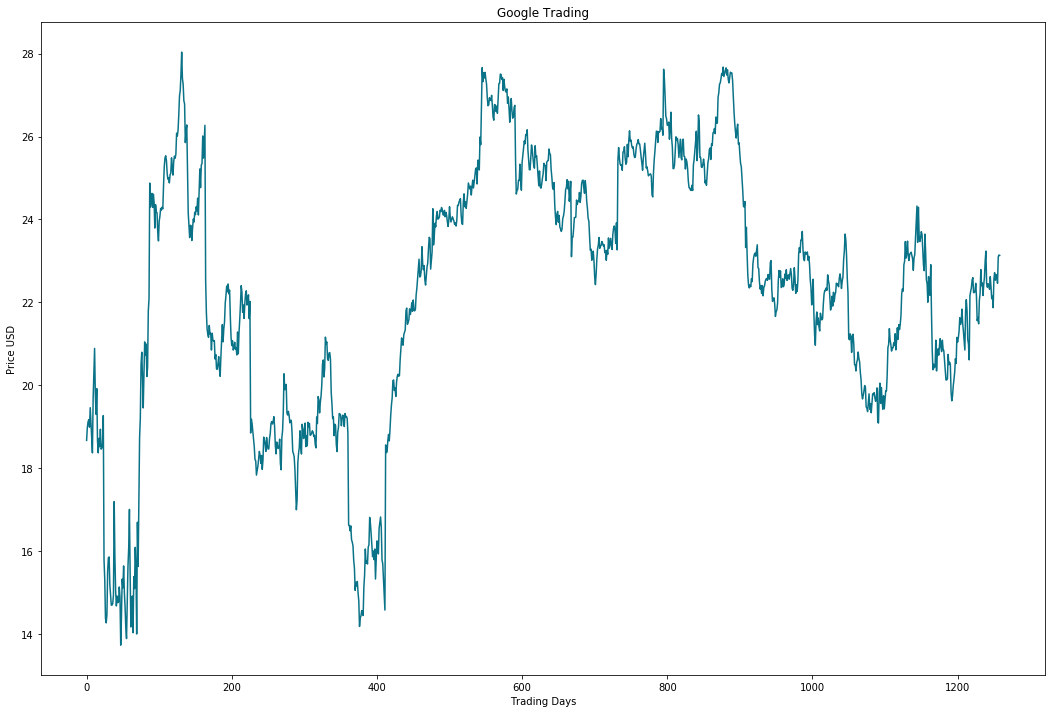

In [18]:
import visualize

visualize.plot_basic(stocks)

**Step 3 :** Normalise the data using minmaxscaler function

In [19]:
stocks = ppd.get_normalised_data(stocks)
print(stocks.head())

print("\n")
print("Open   --- mean :", np.mean(stocks['Open']),  "  \t Std: ", np.std(stocks['Open']),  "  \t Max: ", np.max(stocks['Open']),  "  \t Min: ", np.min(stocks['Open']))
print("Close  --- mean :", np.mean(stocks['Close']), "  \t Std: ", np.std(stocks['Close']), "  \t Max: ", np.max(stocks['Close']), "  \t Min: ", np.min(stocks['Close']))
print("Volume --- mean :", np.mean(stocks['Volume']),"  \t Std: ", np.std(stocks['Volume']),"  \t Max: ", np.max(stocks['Volume']),"  \t Min: ", np.min(stocks['Volume']))

   Item      Open     Close    Volume
0     0  0.331305  0.345225  0.096025
1     1  0.334009  0.366899  0.229167
2     2  0.342799  0.376687  0.241140
3     3  0.335362  0.380183  0.172773
4     4  0.346856  0.367598  0.104526


Open   --- mean : 0.6092716188098578   	 Std:  0.2258283776350307   	 Max:  0.9999999999999999   	 Min:  0.0
Close  --- mean : 0.5983231157458313   	 Std:  0.2206273323519859   	 Max:  1.0   	 Min:  0.0
Volume --- mean : 0.12105056238759088   	 Std:  0.0988494921241418   	 Max:  0.9999999999999999   	 Min:  0.0


**Step 4 :** Visualize the data again

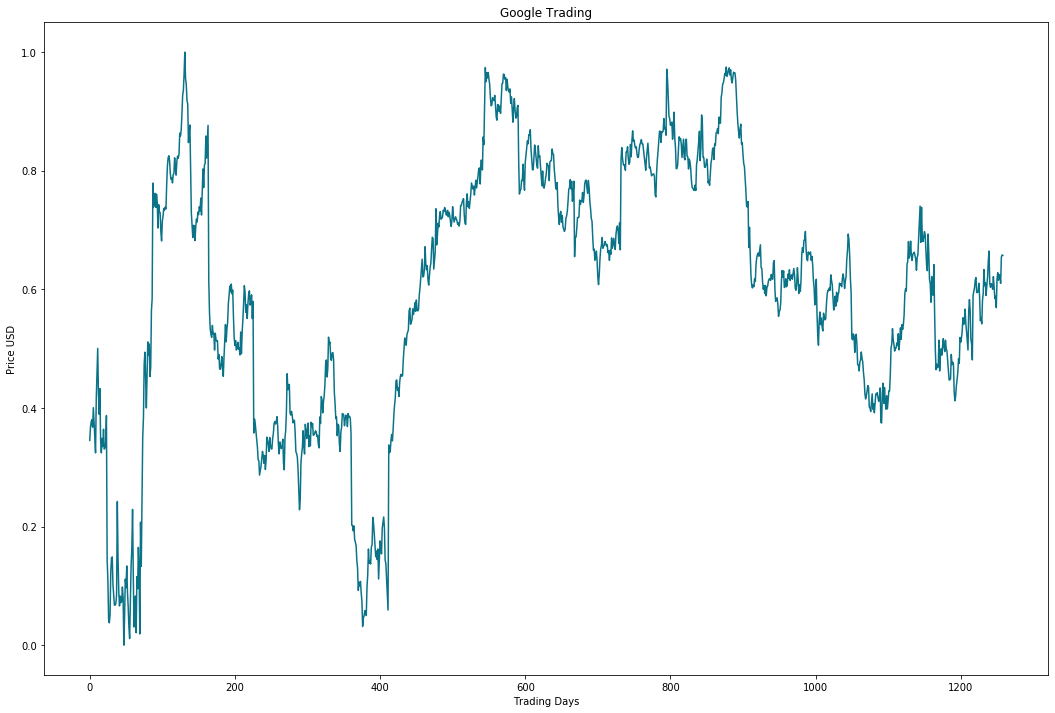

In [20]:
visualize.plot_basic(stocks)

**Step 5:** Log the normalised data for future resuablilty

In [21]:
stocks.to_csv('google_preprocessed.csv',index= False)

# Check Point #2

This is my second checkpoint. The preprocessed data has been saved to disk.

## Bench Mark Model

In this section we will check our bench mark model. As is proposed in my proposal my bench mark model is a simple linear regressor model. 

**Step 1:** Load the preprocessed data

In [22]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('google_preprocessed.csv')
display(stocks.head())

,Item,Open,Close,Volume
0,0,0.331305,0.345225,0.096025
1,1,0.334009,0.366899,0.229167
2,2,0.342799,0.376687,0.241140
3,3,0.335362,0.380183,0.172773
4,4,0.346856,0.367598,0.104526


**Step 2:** Split data into train and test pair

In [23]:
X_train, X_test, y_train, y_test, label_range= sd.train_test_split_linear_regression(stocks)

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (863, 1)
y_train (863, 1)
x_test (396, 1)
y_test (396, 1)


**Step 3:** Train a Linear regressor model on training set and get prediction

In [25]:
model = LinearRegressionModel.build_model(X_train,y_train)

**Step 4:** Get prediction on test set

In [26]:
predictions = LinearRegressionModel.predict_prices(model,X_test, label_range)

**Step 5:** Plot the predicted values against actual

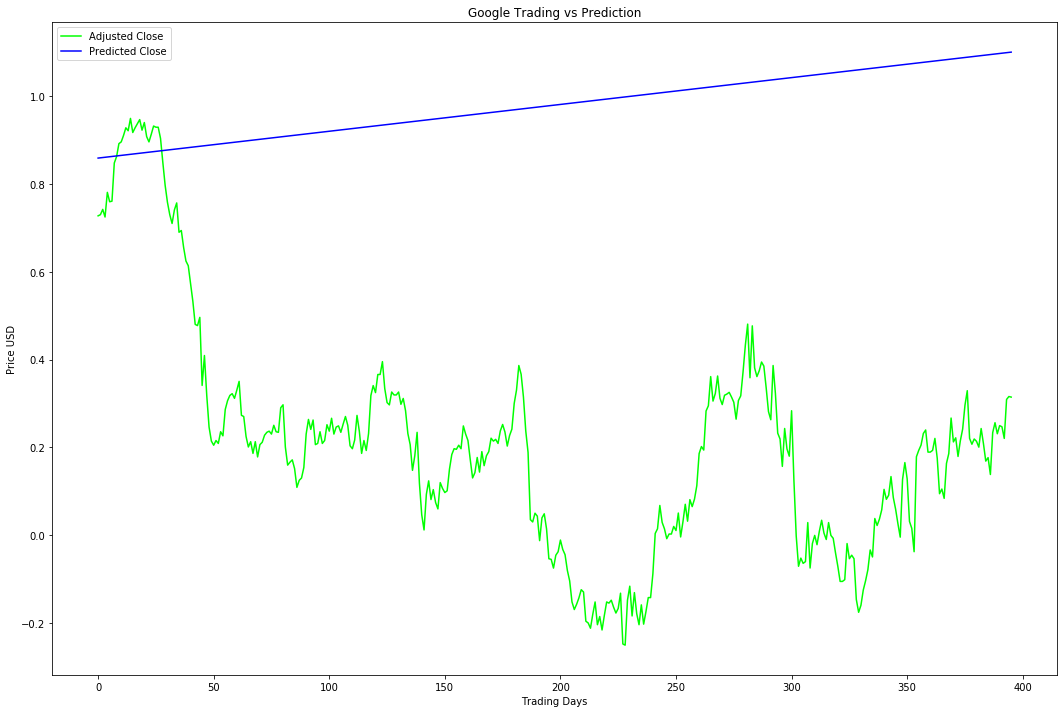

In [27]:
vs.plot_prediction(y_test,predictions)

**Step 6:** measure accuracy of the prediction

In [28]:
trainScore = mean_squared_error(X_train, y_train)
print('Train Score: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = mean_squared_error(predictions, y_test)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.4230 MSE (0.6504 RMSE)
Test Score: 0.68628831 MSE (0.82842520 RMSE)


In [30]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

AttributeError: 'LinearRegression' object has no attribute 'evaluate'

# Checkpoint #3


## Long-Sort Term Memory Model

In this section we will use LSTM to train and test on our data set.

### Basic LSTM Model

First lets make a basic LSTM model.

**Step 1 :** import keras libraries for smooth implementaion of lstm 

In [6]:
import math
import pandas as pd
import numpy as np
from IPython.display import display

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

import lstm, time #helper libraries

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('google_preprocessed.csv')
stocks_data = stocks.drop(['Item'], axis =1)

display(stocks_data.head())

Using Theano backend.


AttributeError: module 'theano' has no attribute 'gof'

In [1]:
X_train, X_test,y_train, y_test = sd.train_test_split_lstm(stocks_data, 5)

unroll_length = 50
X_train = sd.unroll(X_train, unroll_length)
X_test = sd.unroll(X_test, unroll_length)
y_train = y_train[-X_train.shape[0]:]
y_test = y_test[-X_test.shape[0]:]

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

NameError: name 'sd' is not defined

**Step 3 :** Build a basic Long-Short Term Memory model

In [31]:
# build basic lstm model
model = lstm.build_basic_model(input_dim = X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.05954122543334961


**Step 4:** Train the model

In [32]:
model.fit(
    X_train,
    y_train,
    epochs=1,
    validation_split=0.05)

Train on 2459 samples, validate on 130 samples
Epoch 1/1
2459/2459 [==============================] - 44s - loss: 0.0032 - val_loss: 3.3625e-04


**Step 2 :** Split train and test data sets and Unroll train and test data for lstm model

**Step 5:** make prediction using test data

In [7]:
predictions = model.predict(X_test)

NameError: name 'model' is not defined

**Step 6:** Plot the results

In [8]:
vs.plot_lstm_prediction(y_test,predictions)

NameError: name 'vs' is not defined

** Step 7:** Get the test score.

### Improved LSTM Model

**Step 1: ** Build an improved LSTM model

In [47]:
# Set up hyperparameters
batch_size = 100
epochs = 5

# build improved lstm model
model = lstm.build_improved_model( X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

start = time.time()
#final_model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.12258362770080566


**Step 2: ** Train improved LSTM model

In [48]:
model.fit(X_train, 
          y_train, 
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.05
         )

Train on 2459 samples, validate on 130 samples
Epoch 1/5
36s - loss: 0.0078 - val_loss: 7.8077e-04
Epoch 2/5
28s - loss: 9.4908e-04 - val_loss: 9.9577e-04
Epoch 3/5
27s - loss: 7.8394e-04 - val_loss: 3.1191e-04
Epoch 4/5
27s - loss: 6.9765e-04 - val_loss: 3.4707e-04
Epoch 5/5
27s - loss: 6.4507e-04 - val_loss: 2.8518e-04


**Step 3:** Make prediction on improved LSTM model

In [49]:
# Generate predictions 
predictions = model.predict(X_test, batch_size=batch_size)

**Step 4:** plot the results

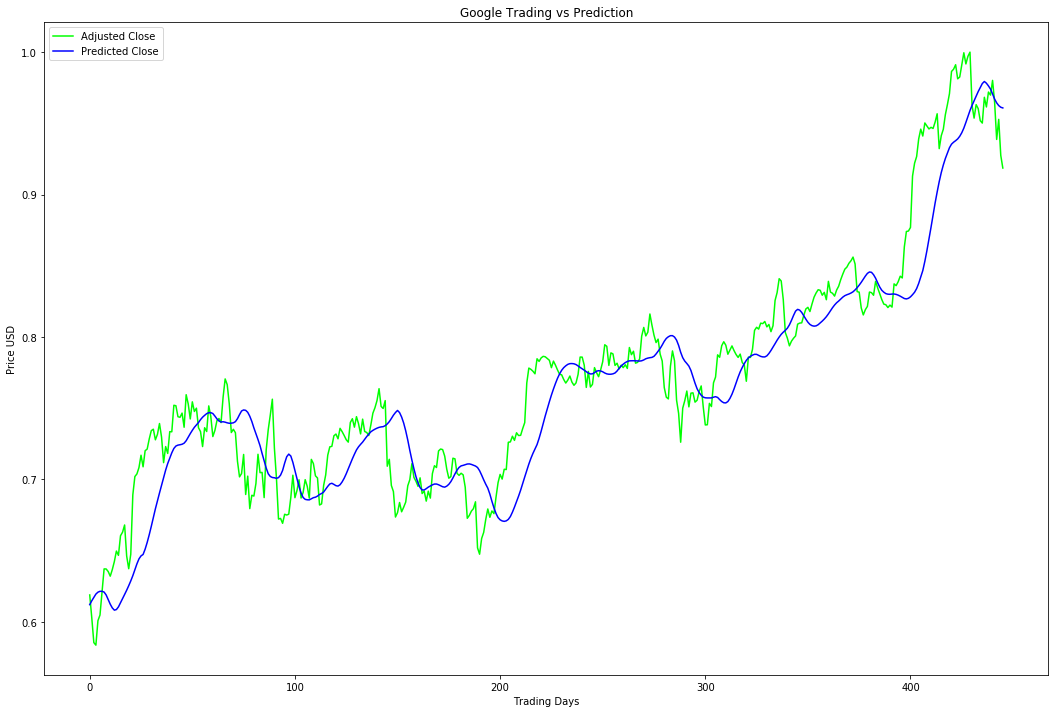

In [50]:
vs.plot_lstm_prediction(y_test,predictions)

**Step 5:** Get the test score

In [51]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00031550 MSE (0.01776241 RMSE)
Test Score: 0.00099105 MSE (0.03148098 RMSE)


In [52]:
range = [np.amin(stocks_data['Close']), np.amax(stocks_data['Close'])]

#Calculate the stock price delta in $

true_delta = testScore*(range[1]-range[0])
print('Delta Price: %.6f - RMSE * Adjusted Close Range' % true_delta)    

Delta Price: 0.000991 - RMSE * Adjusted Close Range


# Checking Robustness of the model

In this section we will check robustness of our LSTM model. I have used new unseen datasets for this from July 1, 2017 to July 20,2017. I have downloaded the data sets from google finance website to check for robustness of the model.

In [53]:
import preprocess_data as ppd

data = pd.read_csv('googl.csv')

stocks = ppd.remove_data(data)

stocks = ppd.get_normalised_data(stocks)

stocks = stocks.drop(['Item'], axis = 1)
#Print the dataframe head and tail
print(stocks.head())

X = stocks[:].as_matrix()
Y = stocks[:]['Close'].as_matrix()

X = sd.unroll(X,1)
Y = Y[-X.shape[0]:]

print(X.shape)
print(Y.shape)

# Generate predictions 
predictions = model.predict(X)

#get the test score
testScore = model.evaluate(X, Y, verbose=0)
print('Test Score: %.4f MSE (%.4f RMSE)' % (testScore, math.sqrt(testScore)))

       Open     Close    Volume
0  0.123901  0.000000  0.606442
1  0.000000  0.174601  1.000000
2  0.010989  0.112263  0.921928
3  0.093132  0.291229  0.575381
4  0.243819  0.430228  0.366556
(12, 1, 3)
(12,)
Test Score: 0.3842 MSE (0.6198 RMSE)
